In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)

from matplotlib import pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

In [2]:
# seaborn short calls
import copy

def barplot(df, label):
    print(df['OUT'].value_counts())
    
    fig = sns.barplot(x=df[label].value_counts().index, y=df[label].value_counts())
    #return fig


def boxplot(df, label):
    plt.figure(figsize=(15,12))
    df_long = pd.melt(df, id_vars=label)
    
    fig = sns.boxplot(x='variable', y='value', data=df_long, hue=label)
    #return fig


def stripplot(df, label):
    plt.figure(figsize=(15,12))
    df_long = pd.melt(df, id_vars=label)
    
    fig = sns.stripplot(x='variable', y='value', data=df_long, hue=label, jitter=True)
    #return fig


def pairplot(df, label, vars=None):
    if(vars==None):
        vars=list(df.columns.values)
        vars.remove(label)
        
    fig = sns.pairplot(df, hue=label, vars=vars)
    #return fig


def distplots(df_org, label, vars=None):
    # init
    classes = list(map(str,df_org[label].unique()))
    indices = list(range(len(classes)))
    colors = sns.color_palette("husl", len(classes))
    
    # convert labels in df in str (for comparism)
    df = copy.deepcopy(df_org)
    df[label] = df[label].astype(str)
    
    # vars = all column-names without label-name
    if(vars==None):
        vars=list(df.columns.values)
        vars.remove(label)
    
    # plot
    fig, axs = plt.subplots(len(vars), len(classes), figsize=(3*len(classes), 3*len(vars)))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    for col in vars:
        for currentClass in classes:
            df_current = df[df[label] == currentClass]
            x_pos = classes.index(currentClass)
            y_pos = vars.index(col)
            title = "col={} & class={}".format(col, currentClass)
            
            dist = sns.distplot(df_current[col], color=colors[x_pos], ax=axs[y_pos, x_pos])
            dist.set_title(title)
            dist.set_xlabel('')
    
    #return fig

## Look at the distribution of the data

In [3]:
df_train = pd.read_csv('data/sample-train.csv')

X_train = df_train.drop('OUT', axis=1)
Y_train = df_train['OUT']

 0    1978
 1      17
-1      14
Name: OUT, dtype: int64


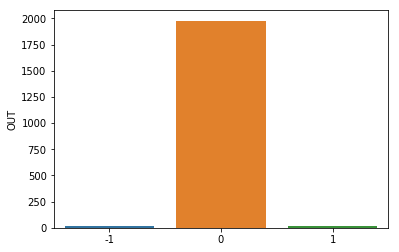

In [4]:
barplot(df_train, label="OUT")

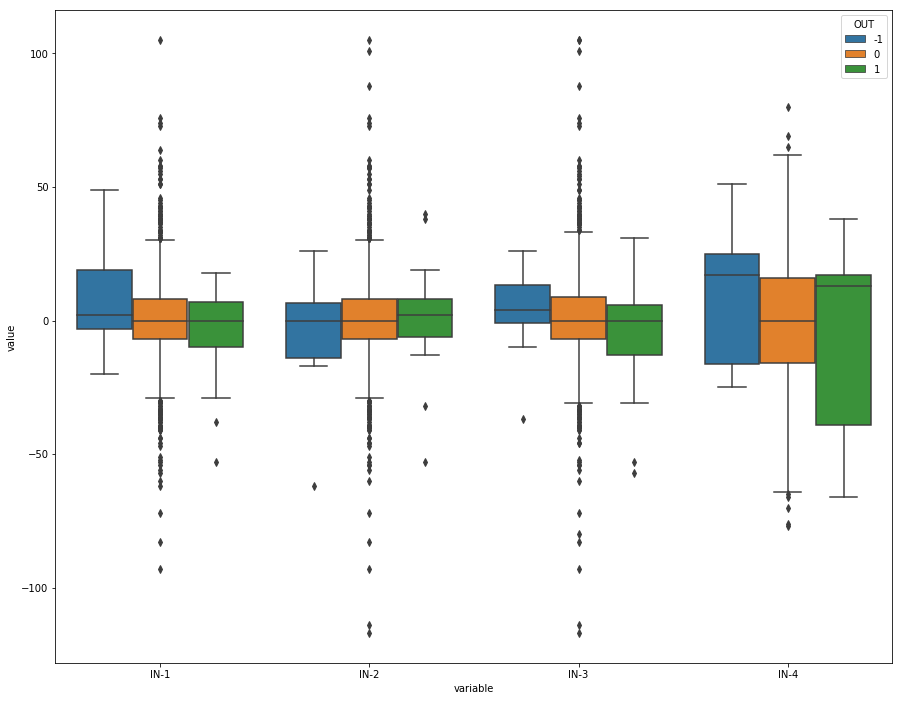

In [5]:
boxplot(df_train, label="OUT")

/home/vagrant/anaconda3/envs/ds/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


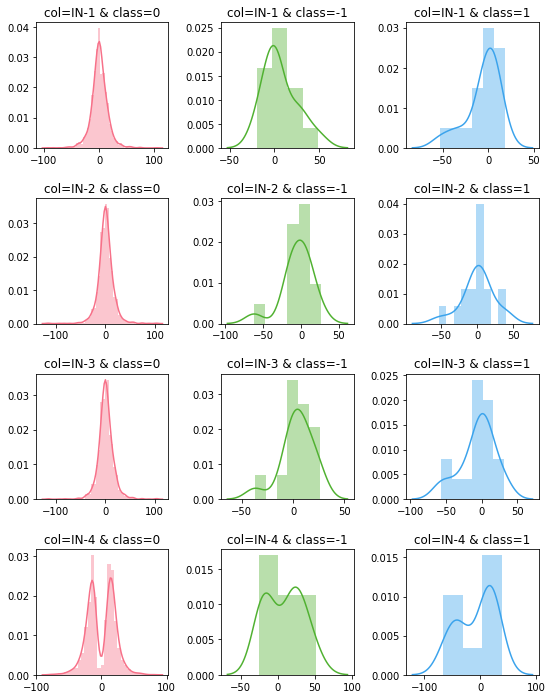

In [6]:
distplots(df_train, label="OUT")

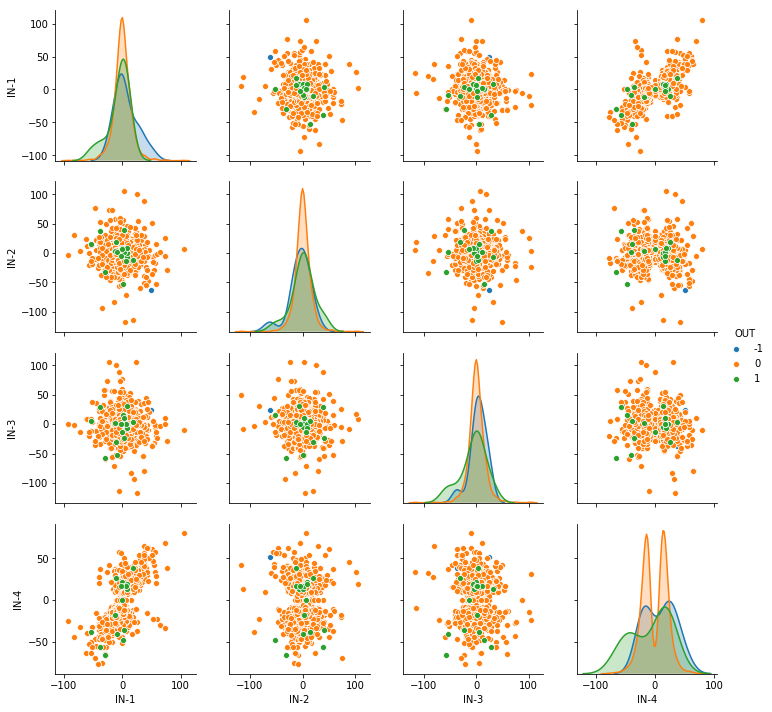

In [7]:
pairplot(df_train, label="OUT")

## Oversampling with pandas
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html

In [8]:
sm = SMOTE()
X_train_res, Y_train_res = sm.fit_sample(X_train, Y_train)

In [9]:
X_train_res = pd.DataFrame(X_train_res, columns=["IN-1", "IN-2", "IN-3", "IN-4"])
Y_train_res = pd.DataFrame(Y_train_res, columns=["OUT"])

df_train_over = pd.concat([X_train_res, Y_train_res], axis=1)

df_train_over.head()

,IN-1,IN-2,IN-3,IN-4,OUT
0,-11,-7,19,-20,0
1,14,4,-28,29,0
2,0,4,-1,-4,0
3,-14,7,5,-16,0
4,-13,6,-72,-24,0


-1    1978
 1    1978
 0    1978
Name: OUT, dtype: int64


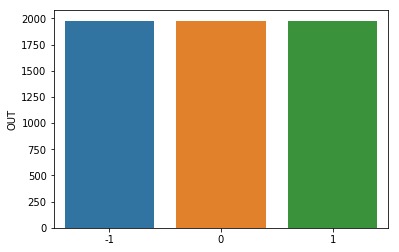

In [10]:
barplot(df_train_over, label="OUT")

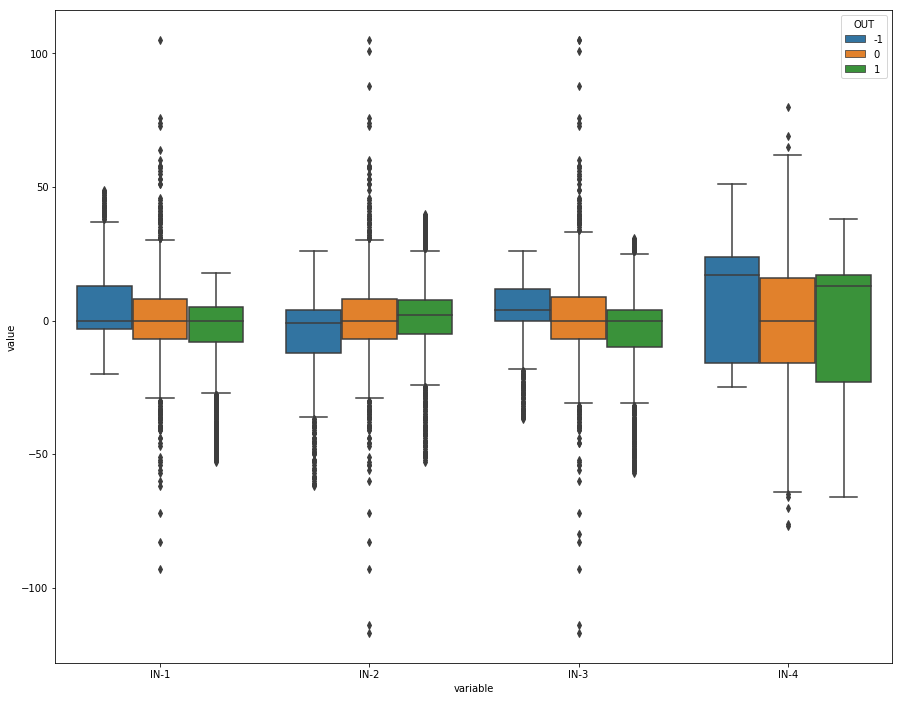

In [11]:
boxplot(df_train_over, label="OUT")

/home/vagrant/anaconda3/envs/ds/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


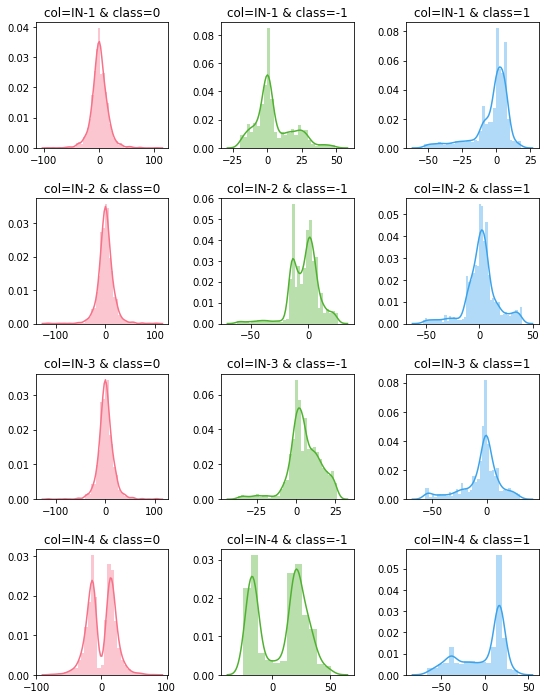

In [12]:
distplots(df_train_over, label="OUT")

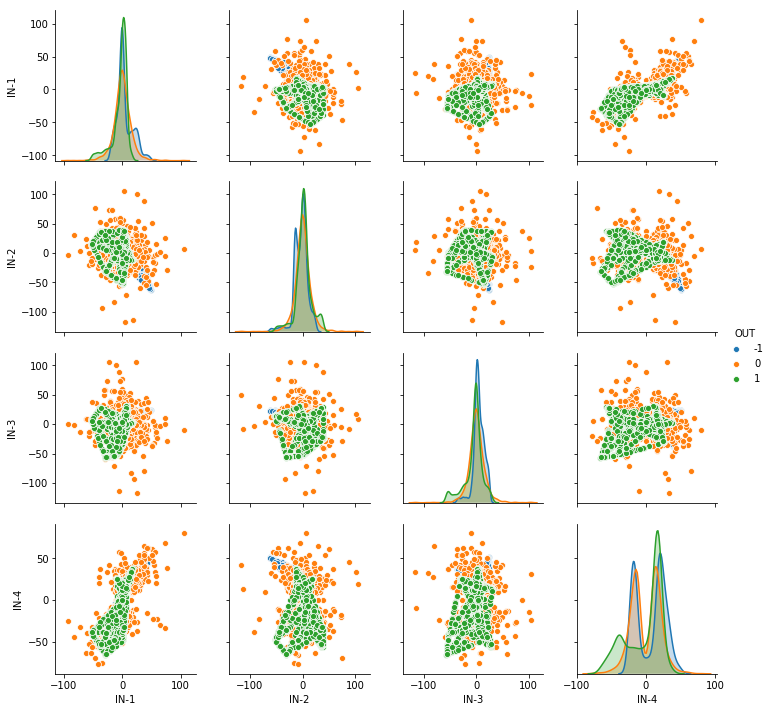

In [13]:
pairplot(df_train_over, label="OUT")

In [15]:
df_train_over.to_csv('data/sample-train-over_smote.csv', sep=',', index=False)